In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:

# Define the Miyazawa-Jernigan potential matrix
# This is the standard MJ matrix from the 1996 publication
mj_matrix = {
    'C': {'C': -5.44, 'M': -4.99, 'F': -5.80, 'I': -5.50, 'L': -5.83, 'V': -5.50, 'W': -7.28, 'Y': -4.16, 'A': -3.57, 'G': -3.16, 'T': -2.59, 'S': -2.86, 'N': -2.59, 'Q': -2.85, 'D': -2.41, 'E': -2.27, 'H': -3.60, 'R': -2.57, 'K': -1.95, 'P': -3.07},
    'M': {'C': -4.99, 'M': -5.46, 'F': -5.71, 'I': -5.32, 'L': -5.68, 'V': -4.96, 'W': -4.91, 'Y': -4.02, 'A': -3.94, 'G': -3.32, 'T': -3.51, 'S': -3.03, 'N': -2.95, 'Q': -3.30, 'D': -3.12, 'E': -3.59, 'H': -3.98, 'R': -3.12, 'K': -3.36, 'P': -3.45},
    'F': {'C': -5.80, 'M': -5.71, 'F': -6.84, 'I': -6.05, 'L': -6.56, 'V': -5.79, 'W': -6.16, 'Y': -5.66, 'A': -3.75, 'G': -3.57, 'T': -3.48, 'S': -3.00, 'N': -3.07, 'Q': -4.10, 'D': -4.12, 'E': -4.32, 'H': -4.77, 'R': -4.13, 'K': -3.36, 'P': -3.76},
    'I': {'C': -5.50, 'M': -5.32, 'F': -6.05, 'I': -6.54, 'L': -6.84, 'V': -6.48, 'W': -5.25, 'Y': -4.91, 'A': -3.90, 'G': -3.78, 'T': -4.03, 'S': -3.52, 'N': -3.24, 'Q': -3.67, 'D': -3.17, 'E': -3.27, 'H': -4.14, 'R': -3.63, 'K': -3.37, 'P': -3.76},
    'L': {'C': -5.83, 'M': -5.68, 'F': -6.56, 'I': -6.84, 'L': -7.37, 'V': -6.29, 'W': -5.73, 'Y': -5.28, 'A': -4.91, 'G': -4.16, 'T': -4.34, 'S': -3.92, 'N': -3.74, 'Q': -4.04, 'D': -4.03, 'E': -4.20, 'H': -4.54, 'R': -4.03, 'K': -3.37, 'P': -4.15},
    'V': {'C': -5.50, 'M': -4.96, 'F': -5.79, 'I': -6.48, 'L': -6.29, 'V': -6.00, 'W': -5.18, 'Y': -4.62, 'A': -4.04, 'G': -3.63, 'T': -4.52, 'S': -3.95, 'N': -3.58, 'Q': -3.77, 'D': -3.43, 'E': -3.07, 'H': -4.16, 'R': -3.37, 'K': -3.05, 'P': -3.32},
    'W': {'C': -7.28, 'M': -4.91, 'F': -6.16, 'I': -5.25, 'L': -5.73, 'V': -5.18, 'W': -5.06, 'Y': -5.31, 'A': -3.65, 'G': -3.38, 'T': -3.22, 'S': -2.99, 'N': -3.07, 'Q': -3.42, 'D': -4.25, 'E': -3.73, 'H': -3.98, 'R': -4.91, 'K': -3.36, 'P': -4.25},
    'Y': {'C': -4.16, 'M': -4.02, 'F': -5.66, 'I': -4.91, 'L': -5.28, 'V': -4.62, 'W': -5.31, 'Y': -5.89, 'A': -3.24, 'G': -3.16, 'T': -3.01, 'S': -2.78, 'N': -2.76, 'Q': -3.63, 'D': -3.11, 'E': -3.01, 'H': -3.52, 'R': -3.16, 'K': -2.60, 'P': -3.19},
    'A': {'C': -3.57, 'M': -3.94, 'F': -3.75, 'I': -3.90, 'L': -4.91, 'V': -4.04, 'W': -3.65, 'Y': -3.24, 'A': -2.72, 'G': -2.31, 'T': -2.32, 'S': -2.01, 'N': -2.95, 'Q': -2.49, 'D': -2.41, 'E': -2.95, 'H': -3.16, 'R': -2.57, 'K': -2.49, 'P': -1.70},
    'G': {'C': -3.16, 'M': -3.32, 'F': -3.57, 'I': -3.78, 'L': -4.16, 'V': -3.63, 'W': -3.38, 'Y': -3.16, 'A': -2.31, 'G': -2.24, 'T': -2.08, 'S': -1.82, 'N': -2.24, 'Q': -2.85, 'D': -2.31, 'E': -2.72, 'H': -3.16, 'R': -2.49, 'K': -2.80, 'P': -2.23},
    'T': {'C': -2.59, 'M': -3.51, 'F': -3.48, 'I': -4.03, 'L': -4.34, 'V': -4.52, 'W': -3.22, 'Y': -3.01, 'A': -2.32, 'G': -2.08, 'T': -3.11, 'S': -1.96, 'N': -1.88, 'Q': -2.12, 'D': -1.80, 'E': -2.12, 'H': -2.42, 'R': -1.80, 'K': -1.74, 'P': -1.90},
    'S': {'C': -2.86, 'M': -3.03, 'F': -3.00, 'I': -3.52, 'L': -3.92, 'V': -3.95, 'W': -2.99, 'Y': -2.78, 'A': -2.01, 'G': -1.82, 'T': -1.96, 'S': -1.67, 'N': -2.85, 'Q': -2.59, 'D': -1.73, 'E': -2.48, 'H': -2.11, 'R': -2.19, 'K': -1.57, 'P': -1.57},
    'N': {'C': -2.59, 'M': -2.95, 'F': -3.07, 'I': -3.24, 'L': -3.74, 'V': -3.58, 'W': -3.07, 'Y': -2.76, 'A': -2.95, 'G': -2.24, 'T': -1.88, 'S': -2.85, 'N': -2.49, 'Q': -1.71, 'D': -1.68, 'E': -1.51, 'H': -2.95, 'R': -2.85, 'K': -2.00, 'P': -1.53},
    'Q': {'C': -2.85, 'M': -3.30, 'F': -4.10, 'I': -3.67, 'L': -4.04, 'V': -3.77, 'W': -3.42, 'Y': -3.63, 'A': -2.49, 'G': -2.85, 'T': -2.12, 'S': -2.59, 'N': -1.71, 'Q': -2.76, 'D': -2.62, 'E': -2.58, 'H': -3.98, 'R': -2.64, 'K': -1.45, 'P': -2.76},
    'D': {'C': -2.41, 'M': -3.12, 'F': -4.12, 'I': -3.17, 'L': -4.03, 'V': -3.43, 'W': -4.25, 'Y': -3.11, 'A': -2.41, 'G': -2.31, 'T': -1.80, 'S': -1.73, 'N': -1.68, 'Q': -2.62, 'D': -2.48, 'E': -1.68, 'H': -2.32, 'R': -2.29, 'K': -1.80, 'P': -1.70},
    'E': {'C': -2.27, 'M': -3.59, 'F': -4.32, 'I': -3.27, 'L': -4.20, 'V': -3.07, 'W': -3.73, 'Y': -3.01, 'A': -2.95, 'G': -2.72, 'T': -2.12, 'S': -2.48, 'N': -1.51, 'Q': -2.58, 'D': -1.68, 'E': -2.67, 'H': -3.07, 'R': -2.90, 'K': -2.49, 'P': -2.39},
    'H': {'C': -3.60, 'M': -3.98, 'F': -4.77, 'I': -4.14, 'L': -4.54, 'V': -4.16, 'W': -3.98, 'Y': -3.52, 'A': -3.16, 'G': -3.16, 'T': -2.42, 'S': -2.11, 'N': -2.95, 'Q': -3.98, 'D': -2.32, 'E': -3.07, 'H': -4.66, 'R': -3.05, 'K': -2.60, 'P': -2.25},
    'R': {'C': -2.57, 'M': -3.12, 'F': -4.13, 'I': -3.63, 'L': -4.03, 'V': -3.37, 'W': -4.91, 'Y': -3.16, 'A': -2.57, 'G': -2.49, 'T': -1.80, 'S': -2.19, 'N': -2.85, 'Q': -2.64, 'D': -2.29, 'E': -2.90, 'H': -3.05, 'R': -3.32, 'K': -2.27, 'P': -1.70},
    'K': {'C': -1.95, 'M': -3.36, 'F': -3.36, 'I': -3.37, 'L': -3.37, 'V': -3.05, 'W': -3.36, 'Y': -2.60, 'A': -2.49, 'G': -2.80, 'T': -1.74, 'S': -1.57, 'N': -2.00, 'Q': -1.45, 'D': -1.80, 'E': -2.49, 'H': -2.60, 'R': -2.27, 'K': -2.03, 'P': -1.29},
    'P': {'C': -3.07, 'M': -3.45, 'F': -3.76, 'I': -3.76, 'L': -4.15, 'V': -3.32, 'W': -4.25, 'Y': -3.19, 'A': -1.70, 'G': -2.23, 'T': -1.90, 'S': -1.57, 'N': -1.53, 'Q': -2.76, 'D': -1.70, 'E': -2.39, 'H': -2.25, 'R': -1.70, 'K': -1.29, 'P': -1.75}
}

print("Miyazawa-Jernigan potential matrix defined")
print(f"Matrix dimensions: 20x20 amino acids")


Miyazawa-Jernigan potential matrix defined
Matrix dimensions: 20x20 amino acids


In [ ]:

# Define scoring functions
def calculate_mj_score(motif_seq, epitope_seq, mj_matrix):
    """
    Calculate raw MJ binding score between motif and epitope sequences.
    More negative scores indicate stronger predicted binding.
    """
    total_score = 0.0
    for aa1 in motif_seq:
        for aa2 in epitope_seq:
            if aa1 in mj_matrix and aa2 in mj_matrix[aa1]:
                total_score += mj_matrix[aa1][aa2]
    return total_score

def calculate_contact_masked_mj_score(motif_seq, epitope_seq, mj_matrix, percentile=30):
    """
    Calculate Contact-Masked MJ score using top N% most favorable interactions.
    This is the validated advanced scoring method from report r57.
    
    Parameters:
    - motif_seq: motif sequence
    - epitope_seq: epitope sequence (31-residue structural epitope for allosteric)
    - mj_matrix: MJ potential matrix
    - percentile: percentile threshold for selecting top interactions (default 30)
    
    Returns:
    - Contact-masked MJ score (sum of top percentile interactions)
    """
    # Calculate all pairwise interactions
    interactions = []
    for aa1 in motif_seq:
        for aa2 in epitope_seq:
            if aa1 in mj_matrix and aa2 in mj_matrix[aa1]:
                score = mj_matrix[aa1][aa2]
                interactions.append(score)
    
    if not interactions:
        return 0.0
    
    # Sort interactions (most negative/favorable first)
    interactions_sorted = sorted(interactions)
    
    # Calculate how many interactions to include (top percentile)
    n_top = max(1, int(len(interactions) * percentile / 100.0))
    
    # Sum the top N% most favorable interactions
    contact_masked_score = sum(interactions_sorted[:n_top])
    
    return contact_masked_score

print("Scoring functions defined:")
print("  - calculate_mj_score: Raw MJ binding score")
print("  - calculate_contact_masked_mj_score: Contact-Masked MJ score (30th percentile)")


Scoring functions defined:
  - calculate_mj_score: Raw MJ binding score
  - calculate_contact_masked_mj_score: Contact-Masked MJ score (30th percentile)


In [ ]:

# Define epitope sequences
COMPETITIVE_EPITOPE = "SCSRGVSKQRIIGVGEVLDR"  # 20 residues
ALLOSTERIC_EPITOPE_31 = "KGVTPSQIGRLHFNSTGWNVTDKTQCIQKAV"  # 31 residues (structural interface)

print("Epitope sequences defined:")
print(f"  - Competitive epitope (20 residues): {COMPETITIVE_EPITOPE}")
print(f"  - Allosteric epitope (31 residues): {ALLOSTERIC_EPITOPE_31}")


Epitope sequences defined:
  - Competitive epitope (20 residues): SCSRGVSKQRIIGVGEVLDR
  - Allosteric epitope (31 residues): KGVTPSQIGRLHFNSTGWNVTDKTQCIQKAV


In [ ]:

# Step 1: Load and rank allosteric candidates
print("=" * 80)
print("STEP 1: LOADING AND RANKING ALLOSTERIC CANDIDATES")
print("=" * 80)

# Load aromatic hybrid designs
allosteric_df = pd.read_csv('aromatic_hybrid_designs.csv')
print(f"\nLoaded aromatic_hybrid_designs.csv: {allosteric_df.shape[0]} designs")
print(f"Columns: {list(allosteric_df.columns)}")
print("\nFirst few rows:")
print(allosteric_df.head(3))


STEP 1: LOADING AND RANKING ALLOSTERIC CANDIDATES

Loaded aromatic_hybrid_designs.csv: 315 designs
Columns: ['Scaffold', 'Parent_Motif', 'Motif', 'Position', 'Original_AA', 'Mutant_AA', 'Mutation', 'Design_Sequence', 'Is_Novel', 'MJ_Score_Raw']

First few rows:
  Scaffold Parent_Motif      Motif  Position Original_AA Mutant_AA Mutation  \
0     1TEN    VQCLICIVI  VWCLICIVI         2           Q         W      Q2W   
1     2QMT    VQCLICIVI  VWCLICIVI         2           Q         W      Q2W   
2     1FNA    VQCLICIVI  VWCLICIVI         2           Q         W      Q2W   

                                     Design_Sequence  Is_Novel  MJ_Score_Raw  
0       GSDTITNATIVWCLICIVIKVQAPDYNVTAKAIGSLRAQACKVV      True      -5727.55  
1  MIEKKIEKLEEHLGLVWCLICIVIAESVEQVLSLKDAADLAVVQKT...      True      -5727.55  
2  MQYKLILNGKTLKGETTTEAVWCLICIVIVDAATAEKVFKQYANDN...      True      -5727.55  


In [ ]:

# Calculate Contact-Masked MJ scores for all allosteric candidates
print("\nCalculating Contact-Masked MJ scores for allosteric candidates...")
print(f"Using 31-residue allosteric epitope: {ALLOSTERIC_EPITOPE_31}")

contact_masked_scores = []
for idx, row in allosteric_df.iterrows():
    motif = row['Motif']
    score = calculate_contact_masked_mj_score(motif, ALLOSTERIC_EPITOPE_31, mj_matrix, percentile=30)
    contact_masked_scores.append(score)

allosteric_df['Contact_Masked_MJ_Score'] = contact_masked_scores

# Rank by Contact-Masked MJ score (most negative is best)
allosteric_df_ranked = allosteric_df.sort_values('Contact_Masked_MJ_Score', ascending=True).reset_index(drop=True)

print(f"\nTop 10 allosteric candidates by Contact-Masked MJ score:")
print(allosteric_df_ranked[['Scaffold', 'Motif', 'Mutation', 'Contact_Masked_MJ_Score', 'MJ_Score_Raw']].head(10))



Calculating Contact-Masked MJ scores for allosteric candidates...
Using 31-residue allosteric epitope: KGVTPSQIGRLHFNSTGWNVTDKTQCIQKAV

Top 10 allosteric candidates by Contact-Masked MJ score:
  Scaffold      Motif Mutation  Contact_Masked_MJ_Score  MJ_Score_Raw
0     1TEN  VFCLICIVI      Q2F                  -502.17       -5683.8
1     1FNA  VFCLICVII      Q2F                  -502.17       -5683.8
2     2QMT  VFCLICVII      Q2F                  -502.17       -5683.8
3     1TEN  VFCLICVII      Q2F                  -502.17       -5683.8
4     2QMT  VFCLVCIII      Q2F                  -502.17       -5683.8
5     1FNA  IFCLVCVII      Q2F                  -502.17       -5683.8
6     1TEN  IFCLVCVII      Q2F                  -502.17       -5683.8
7     2QMT  IFCLVCVII      Q2F                  -502.17       -5683.8
8     1TEN  VFCLVCIII      Q2F                  -502.17       -5683.8
9     1FNA  VFCLVCIII      Q2F                  -502.17       -5683.8


In [ ]:

# Select top 48 unique sequences from allosteric candidates
print("\nSelecting top 48 unique allosteric sequences...")

# Get unique sequences while preserving rank order
allosteric_unique = allosteric_df_ranked.drop_duplicates(subset='Design_Sequence', keep='first')
top_48_allosteric = allosteric_unique.head(48).copy()

print(f"Total unique allosteric sequences: {len(allosteric_unique)}")
print(f"Selected top 48 unique sequences")
print(f"\nContact-Masked MJ Score range:")
print(f"  Best (most negative): {top_48_allosteric['Contact_Masked_MJ_Score'].min():.2f}")
print(f"  Worst (least negative): {top_48_allosteric['Contact_Masked_MJ_Score'].max():.2f}")



Selecting top 48 unique allosteric sequences...
Total unique allosteric sequences: 315
Selected top 48 unique sequences

Contact-Masked MJ Score range:
  Best (most negative): -502.17
  Worst (least negative): -488.43


In [ ]:

# Step 2: Load MJ validation test pair
print("\n" + "=" * 80)
print("STEP 2: LOADING MJ VALIDATION TEST PAIR")
print("=" * 80)

# Load the test pair
test_pair_df = pd.read_csv('mj_validation_test_pair_report.csv')
print(f"\nLoaded mj_validation_test_pair_report.csv: {test_pair_df.shape[0]} designs")
print(f"Columns: {list(test_pair_df.columns)}")
print("\nTest pair designs:")
print(test_pair_df)



STEP 2: LOADING MJ VALIDATION TEST PAIR

Loaded mj_validation_test_pair_report.csv: 1 designs
Columns: ['Test_Pair_ID', 'Original_Motif', 'Original_Motif_Design', 'Original_Motif_Sequence', 'Original_MJ_Score', 'Optimized_Motif', 'Optimized_Motif_Design', 'Optimized_Motif_Sequence', 'Optimized_MJ_Score', 'MJ_Score_Difference', 'Percent_Improvement_Predicted', 'Hypothesis']

Test pair designs:
              Test_Pair_ID Original_Motif Original_Motif_Design  \
0  MJ_Validation_Test_Pair      LYDFGISFM  Design_1TEN_Original   

                             Original_Motif_Sequence  Original_MJ_Score  \
0  RLDAPSQIEVKDVTDTTALITWFKLYDFGISFMLTYGIKDVPGDRT...           35222.62   

  Optimized_Motif Optimized_Motif_Design  \
0       LYAFVILFM  Design_1TEN_Optimized   

                            Optimized_Motif_Sequence  Optimized_MJ_Score  \
0  RLDAPSQIEVKDVTDTTALITWFKLYAFVILFMLTYGIKDVPGDRT...            35352.96   

   MJ_Score_Difference  Percent_Improvement_Predicted  \
0               13

In [ ]:

# Extract the two test pair sequences and calculate their Contact-Masked MJ scores
print("\nExtracting test pair sequences...")

# Get the two sequences
original_seq = test_pair_df.loc[0, 'Original_Motif_Sequence']
optimized_seq = test_pair_df.loc[0, 'Optimized_Motif_Sequence']
original_motif = test_pair_df.loc[0, 'Original_Motif']
optimized_motif = test_pair_df.loc[0, 'Optimized_Motif']

print(f"\nOriginal design (Design_1TEN_Original):")
print(f"  Motif: {original_motif}")
print(f"  Sequence: {original_seq[:50]}...")

print(f"\nOptimized design (Design_1TEN_Optimized):")
print(f"  Motif: {optimized_motif}")
print(f"  Sequence: {optimized_seq[:50]}...")

# Calculate Contact-Masked MJ scores for test pair
original_cm_score = calculate_contact_masked_mj_score(original_motif, ALLOSTERIC_EPITOPE_31, mj_matrix, percentile=30)
optimized_cm_score = calculate_contact_masked_mj_score(optimized_motif, ALLOSTERIC_EPITOPE_31, mj_matrix, percentile=30)

print(f"\nContact-Masked MJ Scores for test pair:")
print(f"  Original: {original_cm_score:.2f}")
print(f"  Optimized: {optimized_cm_score:.2f}")
print(f"  Difference: {optimized_cm_score - original_cm_score:.2f}")



Extracting test pair sequences...

Original design (Design_1TEN_Original):
  Motif: LYDFGISFM
  Sequence: RLDAPSQIEVKDVTDTTALITWFKLYDFGISFMLTYGIKDVPGDRTTIDL...

Optimized design (Design_1TEN_Optimized):
  Motif: LYAFVILFM
  Sequence: RLDAPSQIEVKDVTDTTALITWFKLYAFVILFMLTYGIKDVPGDRTTIDL...

Contact-Masked MJ Scores for test pair:
  Original: -437.63
  Optimized: -478.13
  Difference: -40.50


In [ ]:

# Create dataframe entries for the test pair
print("\nCreating test pair entries for portfolio...")

# Create DataFrame for test pair
test_pair_entries = []

# Original design
test_pair_entries.append({
    'Scaffold': '1TEN',
    'Motif': original_motif,
    'Design_Sequence': original_seq,
    'Contact_Masked_MJ_Score': original_cm_score,
    'MJ_Score_Raw': test_pair_df.loc[0, 'Original_MJ_Score'],
    'Design_Name': 'Design_1TEN_Original',
    'Note': 'MJ_Validation_Test_Pair'
})

# Optimized design
test_pair_entries.append({
    'Scaffold': '1TEN',
    'Motif': optimized_motif,
    'Design_Sequence': optimized_seq,
    'Contact_Masked_MJ_Score': optimized_cm_score,
    'MJ_Score_Raw': test_pair_df.loc[0, 'Optimized_MJ_Score'],
    'Design_Name': 'Design_1TEN_Optimized',
    'Note': 'MJ_Validation_Test_Pair'
})

test_pair_portfolio = pd.DataFrame(test_pair_entries)
print(f"Created test pair entries: {len(test_pair_portfolio)} designs")
print(test_pair_portfolio[['Design_Name', 'Motif', 'Contact_Masked_MJ_Score']])



Creating test pair entries for portfolio...
Created test pair entries: 2 designs
             Design_Name      Motif  Contact_Masked_MJ_Score
0   Design_1TEN_Original  LYDFGISFM                  -437.63
1  Design_1TEN_Optimized  LYAFVILFM                  -478.13


In [ ]:

# Combine top 48 allosteric + 2 test pair designs = 50 allosteric total
print("\nCombining allosteric designs with test pair...")

# Add necessary columns to top 48 allosteric for consistency
top_48_allosteric['Note'] = ''

# Combine
allosteric_portfolio = pd.concat([top_48_allosteric, test_pair_portfolio], ignore_index=True)
print(f"Total allosteric portfolio: {len(allosteric_portfolio)} designs")
print(f"  - Top aromatic hybrid designs: 48")
print(f"  - MJ validation test pair: 2")

print("\nAllosteric portfolio summary:")
print(allosteric_portfolio[['Scaffold', 'Motif', 'Contact_Masked_MJ_Score', 'Note']].head(10))



Combining allosteric designs with test pair...
Total allosteric portfolio: 50 designs
  - Top aromatic hybrid designs: 48
  - MJ validation test pair: 2

Allosteric portfolio summary:
  Scaffold      Motif  Contact_Masked_MJ_Score Note
0     1TEN  VFCLICIVI                  -502.17     
1     1FNA  VFCLICVII                  -502.17     
2     2QMT  VFCLICVII                  -502.17     
3     1TEN  VFCLICVII                  -502.17     
4     2QMT  VFCLVCIII                  -502.17     
5     1FNA  IFCLVCVII                  -502.17     
6     1TEN  IFCLVCVII                  -502.17     
7     2QMT  IFCLVCVII                  -502.17     
8     1TEN  VFCLVCIII                  -502.17     
9     1FNA  VFCLVCIII                  -502.17     


In [ ]:

# Step 3: Load and rank competitive candidates
print("\n" + "=" * 80)
print("STEP 3: LOADING AND RANKING COMPETITIVE CANDIDATES")
print("=" * 80)

# Load short hybrid competitive designs
competitive_df = pd.read_csv('short_hybrid_competitive_designs.csv')
print(f"\nLoaded short_hybrid_competitive_designs.csv: {competitive_df.shape[0]} designs")
print(f"Columns: {list(competitive_df.columns)}")
print("\nFirst few rows:")
print(competitive_df.head(3))



STEP 3: LOADING AND RANKING COMPETITIVE CANDIDATES

Loaded short_hybrid_competitive_designs.csv: 19188 designs
Columns: ['Scaffold', 'Loop_Position', 'Loop_Range', 'Parent_Motif', 'Motif', 'Motif_Length', 'Mutation_Type', 'Parent_MJ_Score', 'MJ_Score', 'Design_Sequence']

First few rows:
  Scaffold  Loop_Position Loop_Range Parent_Motif      Motif  Motif_Length  \
0     2QMT              3      45-53    YQYYYSGSY  YQYYYAGAY             9   
1     2QMT              2      30-38    YQYYYSGSY  YQYYYAGAY             9   
2     2QMT              1      17-25    YQYYYSGSY  YQYYYAGAY             9   

  Mutation_Type  Parent_MJ_Score  MJ_Score  \
0        Double           -50.27    -55.51   
1        Double           -50.27    -55.51   
2        Double           -50.27    -55.51   

                                     Design_Sequence  
0  MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYQ...  
1  MQYKLILNGKTLKGETTTEAVDAATAEKVYQYYYAGAYVDGEWTYD...  
2  MQYKLILNGKTLKGETYQYYYAGAYAEKVFKQYANDNGVDGEWT

In [ ]:

# Verify that competitive motifs are already ranked by MJ score
print("\nExamining competitive designs ranking...")
print(f"Current sorting: MJ_Score column")
print("\nTop 10 competitive designs by MJ score:")
print(competitive_df[['Scaffold', 'Motif', 'Motif_Length', 'Mutation_Type', 'MJ_Score']].head(10))

print(f"\nMJ Score range:")
print(f"  Best (most negative): {competitive_df['MJ_Score'].min():.2f}")
print(f"  Worst (least negative): {competitive_df['MJ_Score'].max():.2f}")

# Check if already sorted
is_sorted = competitive_df['MJ_Score'].is_monotonic_increasing
print(f"\nAlready sorted by MJ_Score (ascending): {is_sorted}")



Examining competitive designs ranking...
Current sorting: MJ_Score column

Top 10 competitive designs by MJ score:
  Scaffold      Motif  Motif_Length Mutation_Type  MJ_Score
0     2QMT  YQYYYAGAY             9        Double    -55.51
1     2QMT  YQYYYAGAY             9        Double    -55.51
2     2QMT  YQYYYAGAY             9        Double    -55.51
3     1TEN  YQYYYAGAY             9        Double    -55.51
4     1FNA  YQYYYAGAY             9        Double    -55.51
5     1TEN  YQYYYAGAY             9        Double    -55.51
6     1FNA  YQYYYAGAY             9        Double    -55.51
7     1FNA  YQYYYAGAY             9        Double    -55.51
8     1TEN  YQYYYAGAY             9        Double    -55.51
9     1FNA  QGIIDFLAW             9        Double    -54.85

MJ Score range:
  Best (most negative): -55.51
  Worst (least negative): -37.28

Already sorted by MJ_Score (ascending): True


In [ ]:

# Select top 50 unique sequences from competitive candidates
print("\nSelecting top 50 unique competitive sequences...")

# Get unique sequences while preserving rank order
competitive_unique = competitive_df.drop_duplicates(subset='Design_Sequence', keep='first')
top_50_competitive = competitive_unique.head(50).copy()

print(f"Total unique competitive sequences: {len(competitive_unique)}")
print(f"Selected top 50 unique sequences")
print(f"\nRaw MJ Score range:")
print(f"  Best (most negative): {top_50_competitive['MJ_Score'].min():.2f}")
print(f"  Worst (least negative): {top_50_competitive['MJ_Score'].max():.2f}")



Selecting top 50 unique competitive sequences...
Total unique competitive sequences: 18576
Selected top 50 unique sequences

Raw MJ Score range:
  Best (most negative): -55.51
  Worst (least negative): -54.54


In [ ]:

# Step 4: Assemble the final 100-candidate portfolio
print("\n" + "=" * 80)
print("STEP 4: ASSEMBLING FINAL 100-CANDIDATE PORTFOLIO")
print("=" * 80)

# Prepare allosteric portfolio (50 designs)
allosteric_final = allosteric_portfolio.copy()
allosteric_final['Epitope_Target'] = 'Allosteric'
allosteric_final['Score_Type'] = 'Contact_Masked_MJ'
allosteric_final['Binding_Score'] = allosteric_final['Contact_Masked_MJ_Score']

# Prepare competitive portfolio (50 designs)
competitive_final = top_50_competitive.copy()
competitive_final['Epitope_Target'] = 'Competitive'
competitive_final['Score_Type'] = 'Raw_MJ'
competitive_final['Binding_Score'] = competitive_final['MJ_Score']
competitive_final['Note'] = ''

# Combine
final_portfolio = pd.concat([allosteric_final, competitive_final], ignore_index=True)
final_portfolio['Final_Rank'] = range(1, len(final_portfolio) + 1)

print(f"\nFinal portfolio assembled: {len(final_portfolio)} designs")
print(f"  - Allosteric candidates: 50 (48 aromatic hybrid + 2 test pair)")
print(f"  - Competitive candidates: 50")
print(f"\nPortfolio composition:")
print(final_portfolio['Epitope_Target'].value_counts())



STEP 4: ASSEMBLING FINAL 100-CANDIDATE PORTFOLIO

Final portfolio assembled: 100 designs
  - Allosteric candidates: 50 (48 aromatic hybrid + 2 test pair)
  - Competitive candidates: 50

Portfolio composition:
Epitope_Target
Allosteric     50
Competitive    50
Name: count, dtype: int64


In [ ]:

# Step 5: Calculate physicochemical properties (pI and GRAVY) for all designs
print("\n" + "=" * 80)
print("STEP 5: CALCULATING PHYSICOCHEMICAL PROPERTIES")
print("=" * 80)

# Function to calculate pI and GRAVY
def calculate_protein_properties(sequence):
    """Calculate isoelectric point and GRAVY score for a protein sequence."""
    try:
        protein = ProteinAnalysis(sequence)
        pi = protein.isoelectric_point()
        gravy = protein.gravy()
        return pi, gravy
    except Exception as e:
        print(f"Error calculating properties: {e}")
        return None, None

# Calculate properties for all sequences
print("\nCalculating pI and GRAVY scores for all 100 designs...")
pi_values = []
gravy_values = []

for idx, row in final_portfolio.iterrows():
    sequence = row['Design_Sequence']
    pi, gravy = calculate_protein_properties(sequence)
    pi_values.append(pi)
    gravy_values.append(gravy)

final_portfolio['pI'] = pi_values
final_portfolio['GRAVY_Score'] = gravy_values

print(f"\nPhysicochemical properties calculated successfully")
print(f"\nSummary statistics:")
print(f"  pI range: {final_portfolio['pI'].min():.2f} - {final_portfolio['pI'].max():.2f}")
print(f"  GRAVY range: {final_portfolio['GRAVY_Score'].min():.4f} - {final_portfolio['GRAVY_Score'].max():.4f}")



STEP 5: CALCULATING PHYSICOCHEMICAL PROPERTIES

Calculating pI and GRAVY scores for all 100 designs...

Physicochemical properties calculated successfully

Summary statistics:
  pI range: 4.06 - 8.63
  GRAVY range: -0.8589 - 0.8091


In [ ]:

# Compare physicochemical properties between allosteric and competitive designs
print("\nComparing physicochemical properties by epitope target...")

# Group by epitope target
properties_by_target = final_portfolio.groupby('Epitope_Target')[['pI', 'GRAVY_Score']].agg(['mean', 'std', 'min', 'max'])
print("\nProperties by epitope target:")
print(properties_by_target)

# Statistical comparison
from scipy import stats

allosteric_pi = final_portfolio[final_portfolio['Epitope_Target'] == 'Allosteric']['pI']
competitive_pi = final_portfolio[final_portfolio['Epitope_Target'] == 'Competitive']['pI']
allosteric_gravy = final_portfolio[final_portfolio['Epitope_Target'] == 'Allosteric']['GRAVY_Score']
competitive_gravy = final_portfolio[final_portfolio['Epitope_Target'] == 'Competitive']['GRAVY_Score']

print("\nStatistical comparison (Mann-Whitney U test):")
pi_stat, pi_pval = stats.mannwhitneyu(allosteric_pi, competitive_pi)
gravy_stat, gravy_pval = stats.mannwhitneyu(allosteric_gravy, competitive_gravy)

print(f"  pI: U={pi_stat:.2f}, p={pi_pval:.4e}")
print(f"  GRAVY: U={gravy_stat:.2f}, p={gravy_pval:.4e}")



Comparing physicochemical properties by epitope target...

Properties by epitope target:
                      pI                               GRAVY_Score            \
                    mean       std       min       max        mean       std   
Epitope_Target                                                                 
Allosteric      5.958058  1.856269  4.329449  8.634073    0.295160  0.380147   
Competitive     4.943496  0.814087  4.060942  6.299204   -0.200065  0.275908   

                                    
                     min       max  
Epitope_Target                      
Allosteric     -0.491111  0.809091  
Competitive    -0.858929  0.195238  



Statistical comparison (Mann-Whitney U test):
  pI: U=1709.00, p=1.4900e-03
  GRAVY: U=2030.00, p=7.5795e-08


In [ ]:

# Create the final output CSV file
print("\n" + "=" * 80)
print("STEP 6: CREATING FINAL SYNTHESIS PORTFOLIO FILE")
print("=" * 80)

# Select and order columns for final output
output_columns = [
    'Final_Rank',
    'Epitope_Target',
    'Design_Sequence',
    'Motif',
    'Scaffold',
    'Binding_Score',
    'Score_Type',
    'pI',
    'GRAVY_Score',
    'Note'
]

# Rename Design_Sequence to Sequence for consistency
final_output = final_portfolio[output_columns].copy()
final_output = final_output.rename(columns={'Design_Sequence': 'Sequence'})

# Save to CSV
output_filename = 'final_synthesis_portfolio_v3.csv'
final_output.to_csv(output_filename, index=False)

print(f"\nFinal synthesis portfolio saved to: {output_filename}")
print(f"Total designs: {len(final_output)}")
print(f"\nFile structure:")
print(f"Columns: {list(final_output.columns)}")



STEP 6: CREATING FINAL SYNTHESIS PORTFOLIO FILE

Final synthesis portfolio saved to: final_synthesis_portfolio_v3.csv
Total designs: 100

File structure:
Columns: ['Final_Rank', 'Epitope_Target', 'Sequence', 'Motif', 'Scaffold', 'Binding_Score', 'Score_Type', 'pI', 'GRAVY_Score', 'Note']


In [ ]:

# Display summary of final portfolio
print("\n" + "=" * 80)
print("FINAL PORTFOLIO SUMMARY")
print("=" * 80)

# Display first 5 allosteric and first 5 competitive
print("\nTop 5 Allosteric Candidates:")
print(final_output[final_output['Epitope_Target'] == 'Allosteric'][['Final_Rank', 'Motif', 'Scaffold', 'Binding_Score', 'Note']].head(5))

print("\nTop 5 Competitive Candidates:")
print(final_output[final_output['Epitope_Target'] == 'Competitive'][['Final_Rank', 'Motif', 'Scaffold', 'Binding_Score']].head(5))

# Show test pair entries
print("\nMJ Validation Test Pair:")
test_pair_entries_final = final_output[final_output['Note'] == 'MJ_Validation_Test_Pair']
print(test_pair_entries_final[['Final_Rank', 'Motif', 'Binding_Score', 'pI', 'GRAVY_Score']])

print("\n" + "=" * 80)
print("PORTFOLIO STATISTICS")
print("=" * 80)

# Score statistics
print("\nBinding Score Statistics by Target:")
score_stats = final_output.groupby('Epitope_Target')['Binding_Score'].describe()
print(score_stats)

# Scaffold distribution
print("\nScaffold Distribution:")
scaffold_dist = final_output.groupby(['Epitope_Target', 'Scaffold']).size().unstack(fill_value=0)
print(scaffold_dist)



FINAL PORTFOLIO SUMMARY

Top 5 Allosteric Candidates:
   Final_Rank      Motif Scaffold  Binding_Score Note
0           1  VFCLICIVI     1TEN        -502.17     
1           2  VFCLICVII     1FNA        -502.17     
2           3  VFCLICVII     2QMT        -502.17     
3           4  VFCLICVII     1TEN        -502.17     
4           5  VFCLVCIII     2QMT        -502.17     

Top 5 Competitive Candidates:
    Final_Rank      Motif Scaffold  Binding_Score
50          51  YQYYYAGAY     2QMT         -55.51
51          52  YQYYYAGAY     2QMT         -55.51
52          53  YQYYYAGAY     2QMT         -55.51
53          54  YQYYYAGAY     1TEN         -55.51
54          55  YQYYYAGAY     1FNA         -55.51

MJ Validation Test Pair:
    Final_Rank      Motif  Binding_Score        pI  GRAVY_Score
48          49  LYDFGISFM        -437.63  4.329449    -0.491111
49          50  LYAFVILFM        -478.13  4.409194    -0.330000

PORTFOLIO STATISTICS

Binding Score Statistics by Target:
             


Figure saved as: final_synthesis_portfolio_v3_summary.png


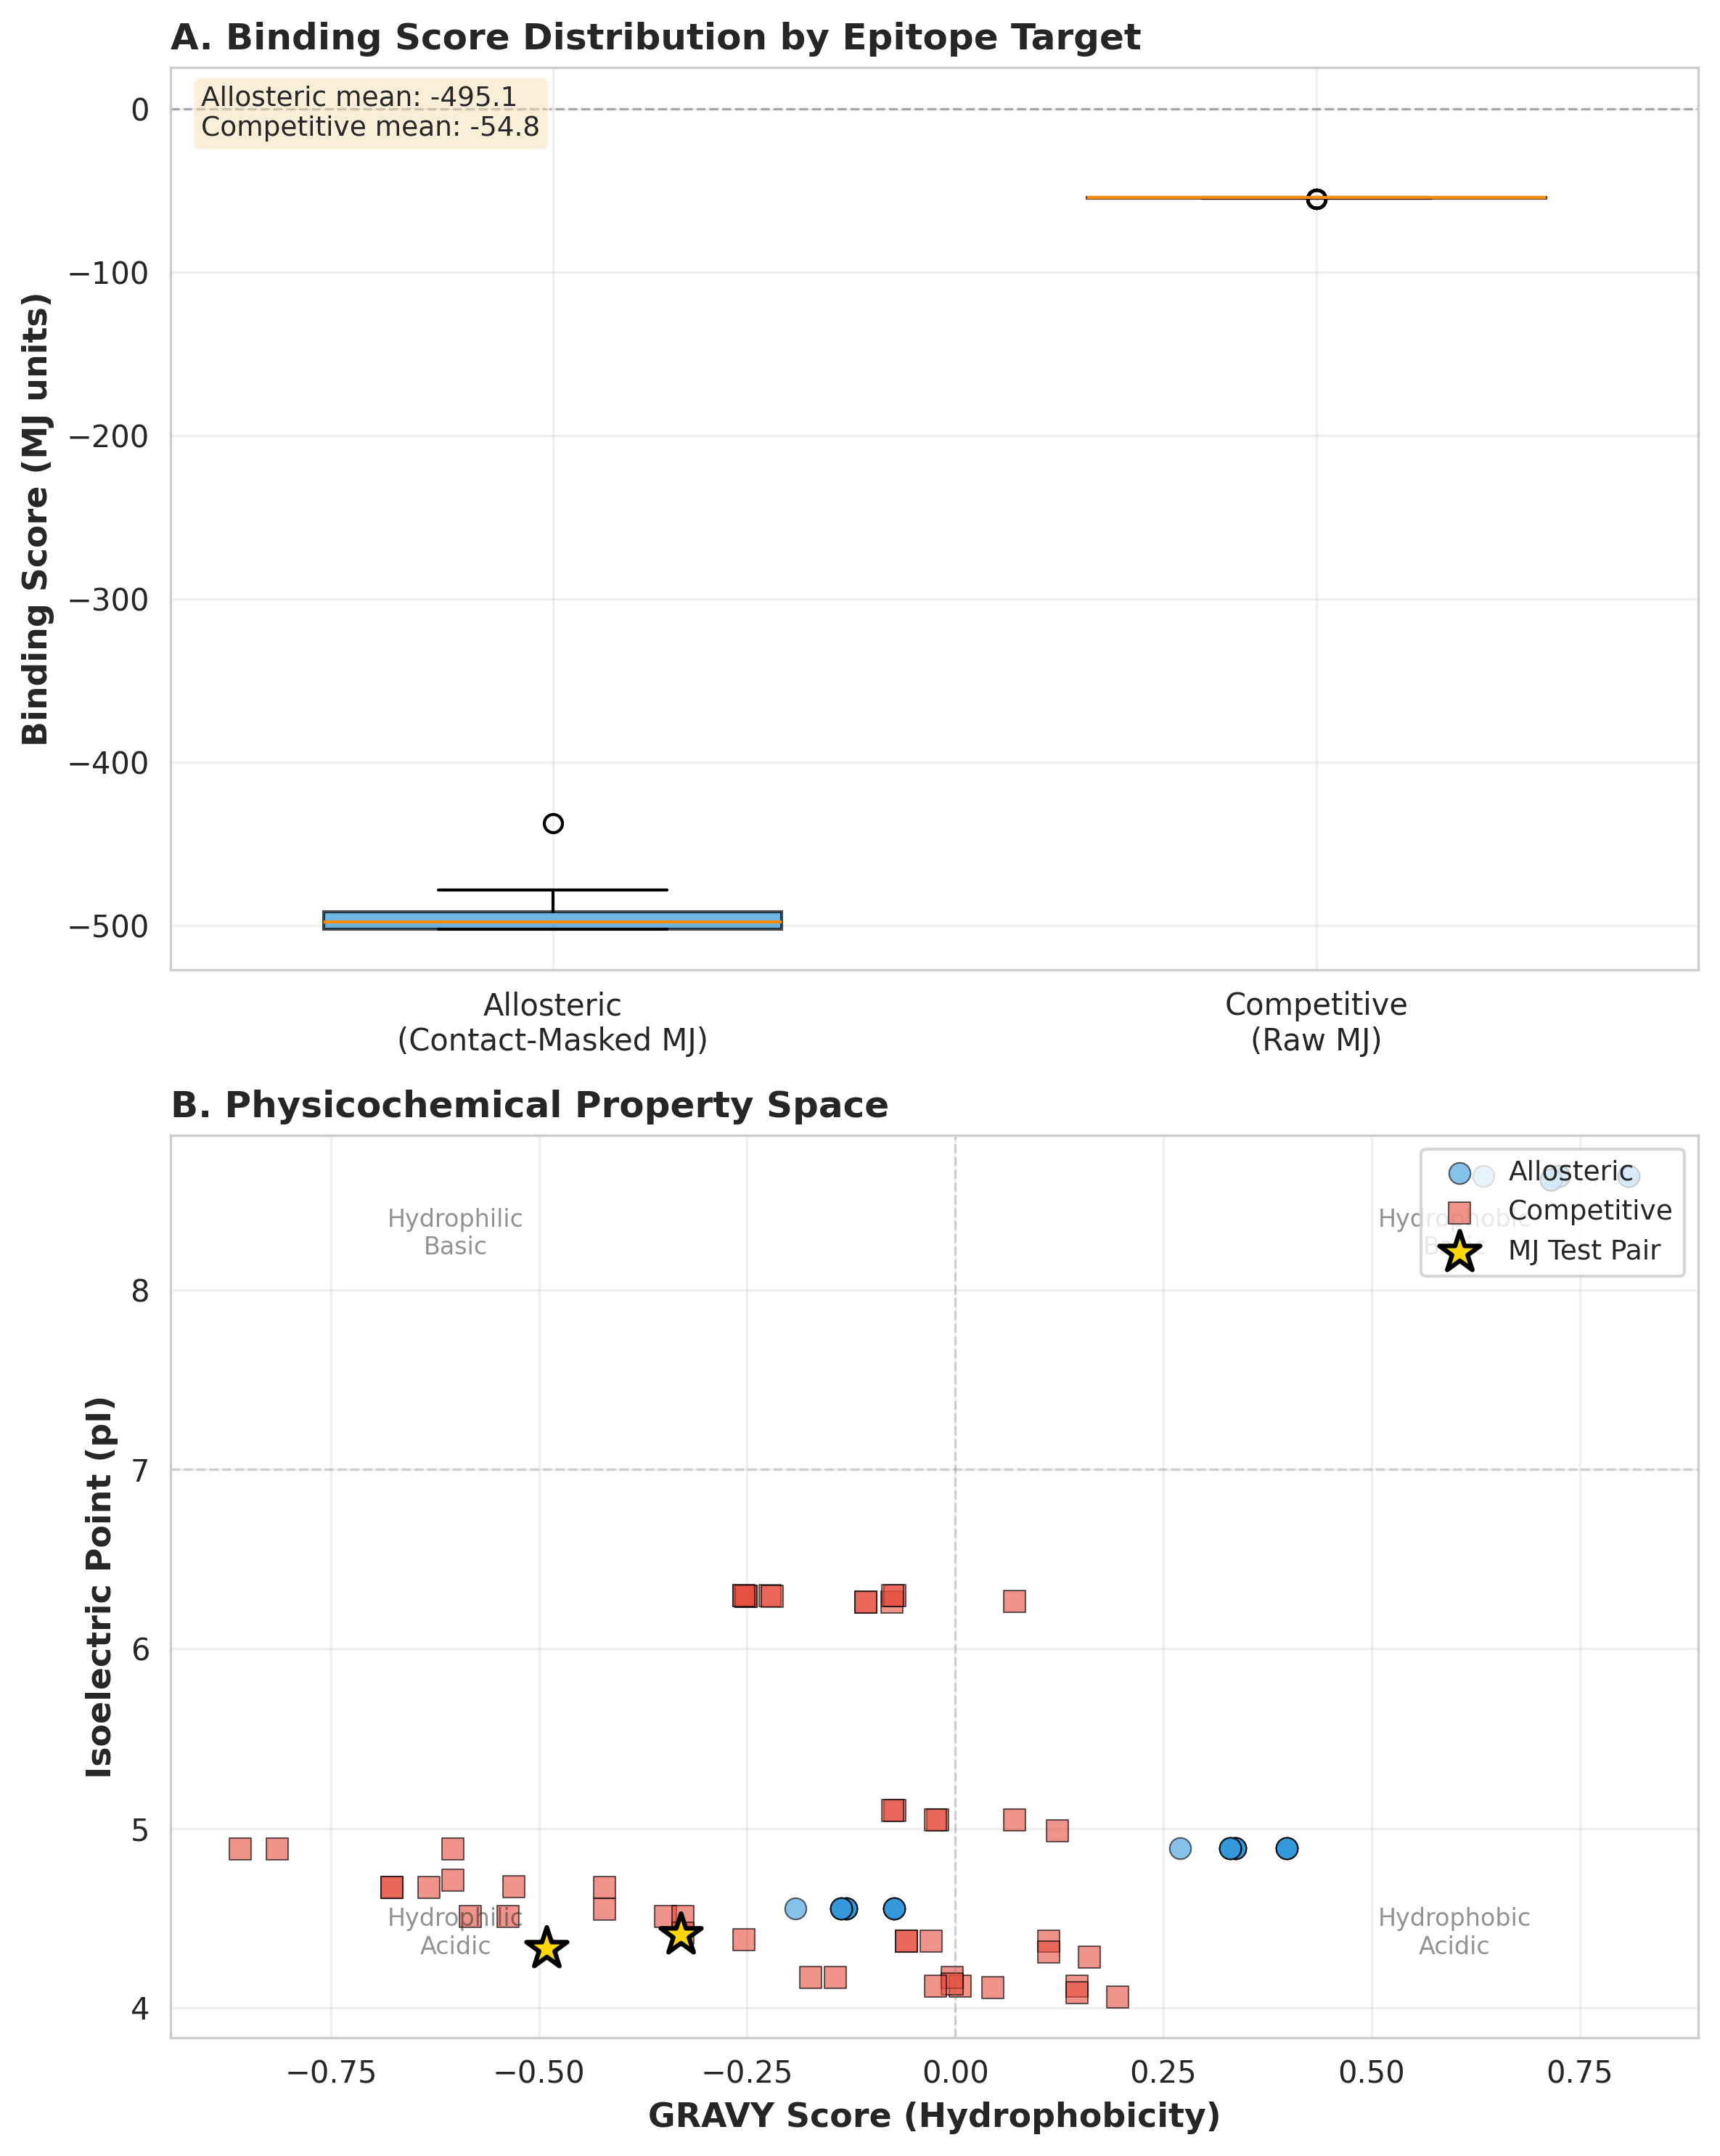

In [ ]:

# Create a final summary figure showing the key characteristics of the portfolio
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

# Create a single column figure with 2 subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Subplot A: Binding Score distributions by epitope target
ax1 = axes[0]
binding_data = [
    final_portfolio[final_portfolio['Epitope_Target'] == 'Allosteric']['Binding_Score'],
    final_portfolio[final_portfolio['Epitope_Target'] == 'Competitive']['Binding_Score']
]
bp1 = ax1.boxplot(binding_data, labels=['Allosteric\n(Contact-Masked MJ)', 'Competitive\n(Raw MJ)'],
                   patch_artist=True, widths=0.6)
# Color the boxes
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_ylabel('Binding Score (MJ units)', fontsize=11, fontweight='bold')
ax1.set_title('A. Binding Score Distribution by Epitope Target', 
              fontsize=12, fontweight='bold', loc='left')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)
ax1.grid(True, alpha=0.3)

# Add statistics text
allosteric_mean = final_portfolio[final_portfolio['Epitope_Target'] == 'Allosteric']['Binding_Score'].mean()
competitive_mean = final_portfolio[final_portfolio['Epitope_Target'] == 'Competitive']['Binding_Score'].mean()
ax1.text(0.02, 0.98, f'Allosteric mean: {allosteric_mean:.1f}\nCompetitive mean: {competitive_mean:.1f}',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

# Subplot B: Physicochemical properties comparison (pI vs GRAVY)
ax2 = axes[1]
for target, color, marker in zip(['Allosteric', 'Competitive'], 
                                   ['#3498db', '#e74c3c'], 
                                   ['o', 's']):
    data = final_portfolio[final_portfolio['Epitope_Target'] == target]
    ax2.scatter(data['GRAVY_Score'], data['pI'], 
               color=color, alpha=0.6, s=50, label=target, marker=marker, edgecolors='black', linewidth=0.5)

# Highlight test pair
test_pair_data = final_portfolio[final_portfolio['Note'] == 'MJ_Validation_Test_Pair']
ax2.scatter(test_pair_data['GRAVY_Score'], test_pair_data['pI'], 
           color='gold', s=200, marker='*', edgecolors='black', linewidth=1.5,
           label='MJ Test Pair', zorder=5)

ax2.set_xlabel('GRAVY Score (Hydrophobicity)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Isoelectric Point (pI)', fontsize=11, fontweight='bold')
ax2.set_title('B. Physicochemical Property Space', 
              fontsize=12, fontweight='bold', loc='left')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=7, color='gray', linestyle='--', linewidth=0.8, alpha=0.3, label='Neutral pH')
ax2.axvline(x=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.3)

# Add quadrant labels
ax2.text(0.6, 8.2, 'Hydrophobic\nBasic', fontsize=8, alpha=0.5, ha='center')
ax2.text(-0.6, 8.2, 'Hydrophilic\nBasic', fontsize=8, alpha=0.5, ha='center')
ax2.text(0.6, 4.3, 'Hydrophobic\nAcidic', fontsize=8, alpha=0.5, ha='center')
ax2.text(-0.6, 4.3, 'Hydrophilic\nAcidic', fontsize=8, alpha=0.5, ha='center')

plt.tight_layout()
plt.savefig('final_synthesis_portfolio_v3_summary.png', dpi=300, bbox_inches='tight')
print("\nFigure saved as: final_synthesis_portfolio_v3_summary.png")
plt.show()


In [ ]:

# Final verification and summary of the portfolio
print("\n" + "=" * 80)
print("FINAL VERIFICATION AND SUMMARY")
print("=" * 80)

# Verify portfolio composition
print("\n1. Portfolio Composition:")
print(f"   Total designs: {len(final_output)}")
print(f"   Allosteric: {len(final_output[final_output['Epitope_Target'] == 'Allosteric'])}")
print(f"   Competitive: {len(final_output[final_output['Epitope_Target'] == 'Competitive'])}")
print(f"   MJ Test Pair: {len(final_output[final_output['Note'] == 'MJ_Validation_Test_Pair'])}")

# Verify scoring methods
print("\n2. Scoring Methods Applied:")
allosteric_scores = final_output[final_output['Epitope_Target'] == 'Allosteric']['Score_Type'].unique()
competitive_scores = final_output[final_output['Epitope_Target'] == 'Competitive']['Score_Type'].unique()
print(f"   Allosteric: {allosteric_scores[0]} (30th percentile contact-masked)")
print(f"   Competitive: {competitive_scores[0]} (direct scoring)")

# Verify uniqueness of sequences
unique_seqs = final_output['Sequence'].nunique()
print(f"\n3. Sequence Uniqueness:")
print(f"   Unique sequences: {unique_seqs} / {len(final_output)}")
if unique_seqs < len(final_output):
    print(f"   WARNING: {len(final_output) - unique_seqs} duplicate sequences detected!")
else:
    print("   All sequences are unique ✓")

# Show binding score distributions
print("\n4. Binding Score Ranges:")
print(f"   Allosteric (Contact-Masked MJ):")
print(f"      Best: {final_output[final_output['Epitope_Target'] == 'Allosteric']['Binding_Score'].min():.2f}")
print(f"      Worst: {final_output[final_output['Epitope_Target'] == 'Allosteric']['Binding_Score'].max():.2f}")
print(f"      Mean ± SD: {allosteric_mean:.2f} ± {final_output[final_output['Epitope_Target'] == 'Allosteric']['Binding_Score'].std():.2f}")
print(f"   Competitive (Raw MJ):")
print(f"      Best: {final_output[final_output['Epitope_Target'] == 'Competitive']['Binding_Score'].min():.2f}")
print(f"      Worst: {final_output[final_output['Epitope_Target'] == 'Competitive']['Binding_Score'].max():.2f}")
print(f"      Mean ± SD: {competitive_mean:.2f} ± {final_output[final_output['Epitope_Target'] == 'Competitive']['Binding_Score'].std():.2f}")

# Show physicochemical property differences
print("\n5. Physicochemical Property Differences (p-values):")
print(f"   pI: p = {pi_pval:.4e} (significant: {'Yes' if pi_pval < 0.05 else 'No'})")
print(f"   GRAVY: p = {gravy_pval:.4e} (significant: {'Yes' if gravy_pval < 0.05 else 'No'})")

# MJ validation test pair details
print("\n6. MJ Validation Test Pair Details:")
test_pair_info = final_output[final_output['Note'] == 'MJ_Validation_Test_Pair'][['Final_Rank', 'Motif', 'Binding_Score', 'pI', 'GRAVY_Score']]
for idx, row in test_pair_info.iterrows():
    design_type = "Original (polar-rich)" if "LYDFGISFM" in row['Motif'] else "Optimized (hydrophobic)"
    print(f"   {design_type}:")
    print(f"      Rank: {row['Final_Rank']}, Motif: {row['Motif']}")
    print(f"      Score: {row['Binding_Score']:.2f}, pI: {row['pI']:.2f}, GRAVY: {row['GRAVY_Score']:.4f}")

print("\n" + "=" * 80)
print("PORTFOLIO GENERATION COMPLETE")
print("=" * 80)
print(f"\nOutput file: {output_filename}")
print(f"Total candidates: 100 (50 allosteric + 50 competitive)")
print("Figure: final_synthesis_portfolio_v3_summary.png")



FINAL VERIFICATION AND SUMMARY

1. Portfolio Composition:
   Total designs: 100
   Allosteric: 50
   Competitive: 50
   MJ Test Pair: 2

2. Scoring Methods Applied:
   Allosteric: Contact_Masked_MJ (30th percentile contact-masked)
   Competitive: Raw_MJ (direct scoring)

3. Sequence Uniqueness:
   Unique sequences: 100 / 100
   All sequences are unique ✓

4. Binding Score Ranges:
   Allosteric (Contact-Masked MJ):
      Best: -502.17
      Worst: -437.63
      Mean ± SD: -495.06 ± 9.86
   Competitive (Raw MJ):
      Best: -55.51
      Worst: -54.54
      Mean ± SD: -54.79 ± 0.36

5. Physicochemical Property Differences (p-values):
   pI: p = 1.4900e-03 (significant: Yes)
   GRAVY: p = 7.5795e-08 (significant: Yes)

6. MJ Validation Test Pair Details:
   Original (polar-rich):
      Rank: 49, Motif: LYDFGISFM
      Score: -437.63, pI: 4.33, GRAVY: -0.4911
   Optimized (hydrophobic):
      Rank: 50, Motif: LYAFVILFM
      Score: -478.13, pI: 4.41, GRAVY: -0.3300

PORTFOLIO GENERATION CO